In [2]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

Configuring variables, loading data and plotting

./experiments_tools/exp_config_generator/experiment/HumanoidBulletEnv-v0-13/S9.fit didn't exist
Couldn't extract the best_g_fit from ./experiments_tools/exp_config_generator/experiment/HumanoidBulletEnv-v0-13/S9.fit
Problem loading IEV and CV data  <class 'FileNotFoundError'>


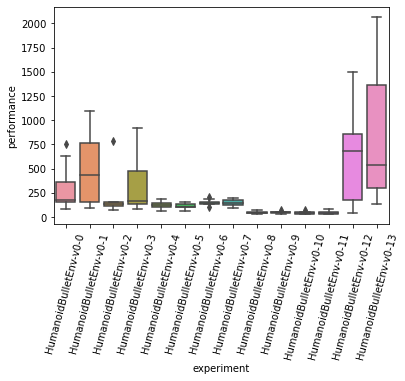

In [4]:
#rootDir = "ini_generator"
rootDir = "experiments_tools/exp_config_generator/experiment"
#expName = "HopperBulletEnv-v0"
#expName = "AntBulletEnv-v0"
#expName = "HalfCheetahBulletEnv-v0"
#expName = "Walker2DBulletEnv-v0"
expName = "HumanoidBulletEnv-v0"
numExp = 14
initSeed = 1
numSeed = 10

#init and automatically filled variables
vStat = []
iev = {}
cv = {}
experiments = [expName+"-"+str(x) for x in range(0,numExp)]

for experiment in experiments:
    expDir = f"./{rootDir}/{experiment}"
    for i in range(initSeed,numSeed+1):
        try:
            f = open(f"{expDir}/S{i}.fit", "r")            
        except:
            print(f"{expDir}/S{i}.fit didn't exist")            
            
        line = f.read()            
        m = re.search("bestgfit ([0-9]*.[0-9]{2})", line)
        if m:
            best_g_fit = float(m.group(1))
        else:
            print(f"Couldn't extract the best_g_fit from {expDir}/S{i}.fit")

        vStat.append((experiment, i, best_g_fit))
            
        try:
            if experiment not in iev.keys():
                iev[experiment] = []
                cv[experiment] = []                
            iev[experiment].append(np.load(f"{expDir}/S{i}.iev.npy", "r"))
            cv[experiment].append(np.load(f"{expDir}/S{i}.cv.npy", "r"))            
        except:
            print("Problem loading IEV and CV data ",sys.exc_info()[0])
            
#print(f"Average performance on {numSeed} seeds: {np.mean(vStat)} - Std deviation: {np.std(vStat)}")
df = pd.DataFrame(vStat,columns=['experiment','seed','performance'])
ax = sns.boxplot(x=df.experiment,y=df.performance)
aux = plt.xticks(rotation=75)

In [56]:
fitStat = np.load(f"{expDir}/statS{i}.npy")  


(8526,)

In [49]:
ver = 1
exp = expName+f"-{ver}"
df[df['experiment']==exp]

,experiment,seed,performance
10,HumanoidBulletEnv-v0-1,1,1097.51
11,HumanoidBulletEnv-v0-1,2,720.15
12,HumanoidBulletEnv-v0-1,3,695.61
13,HumanoidBulletEnv-v0-1,4,184.14
14,HumanoidBulletEnv-v0-1,5,150.65
15,HumanoidBulletEnv-v0-1,6,778.89
16,HumanoidBulletEnv-v0-1,7,89.65
17,HumanoidBulletEnv-v0-1,8,159.62
18,HumanoidBulletEnv-v0-1,9,147.98
19,HumanoidBulletEnv-v0-1,10,799.45


3 9


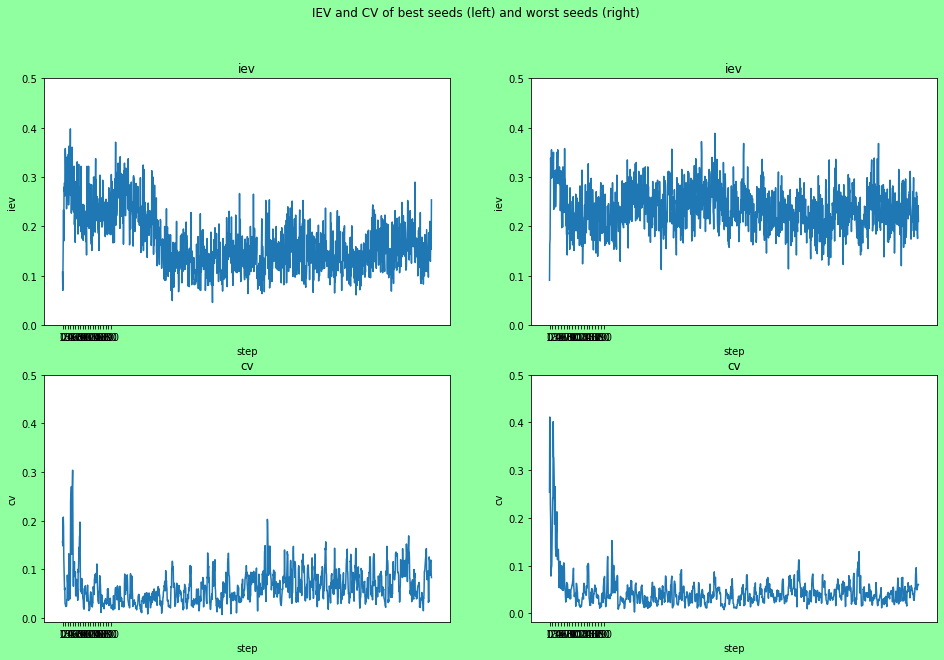

In [43]:
### load cv - iev data
iev_cv_df = pd.DataFrame()
for i in range(10):    
    size = len(cv[exp][i])
    iev_cv_df = pd.concat([iev_cv_df,pd.DataFrame({'seed':np.ones(size)*(i+1),'step':list(range(size)),'iev':list(iev[exp][i])[:size],'cv':list(cv[exp][i])})])

#walker2D-v0-1 - 
seed_best = [np.argmax(df[df['experiment']==exp]["performance"])+1];
seed_worst = [np.argmin(df[df['experiment']==exp]["performance"])+1]

fig, axes = plt.subplots(2*len(seed_best),2,figsize=(16,10))
fig.suptitle('IEV and CV of best seeds (left) and worst seeds (right)')
fig.patch.set_facecolor('xkcd:mint green')

max_x_ticks = 200
step_x_ticks = 10

for i, seed in enumerate(zip(seed_best,seed_worst)):
    print(seed[0],seed[1])
    g = sns.lineplot(data=iev_cv_df[iev_cv_df['seed']==seed[0]],x='step',y='iev',ax=axes[i*2,0])
    g.set_xticks(range(0,max_x_ticks,step_x_ticks))
    g.set_yticks(np.arange(0,0.6,0.1))
    axes[i*2,0].set_title('iev')
    #axes[i*2,0].xticks(len(range(1000)),range(1000))

    g=sns.lineplot(data=iev_cv_df[iev_cv_df['seed']==seed[0]],x='step',y='cv',ax=axes[i*2+1,0])
    g.set_xticks(range(0,max_x_ticks,step_x_ticks))
    g.set_yticks(np.arange(0,0.6,0.1))
    axes[i*2+1,0].set_title('cv')

    #axes[i*2+1,0].xticks(len(range(1000)),range(1000))

    g=sns.lineplot(data=iev_cv_df[iev_cv_df['seed']==seed[1]],x='step',y='iev',ax=axes[i*2,1])
    g.set_xticks(range(0,max_x_ticks,step_x_ticks))
    g.set_yticks(np.arange(0,0.6,0.1))
    axes[i*2,1].set_title('iev')

    #axes[i*2,1].xticks(len(range(1000)),range(1000))

    g=sns.lineplot(data=iev_cv_df[iev_cv_df['seed']==seed[1]],x='step',y='cv',ax=axes[i*2+1,1])
    g.set_xticks(range(0,max_x_ticks,step_x_ticks))
    g.set_yticks(np.arange(0,0.6,0.1))
    axes[i*2+1,1].set_title('cv')
    

    #axes[i*2+1,1].xticks(len(range(1000)),range(1000))

Text(0, 0.5, 'IEV Moving Average')

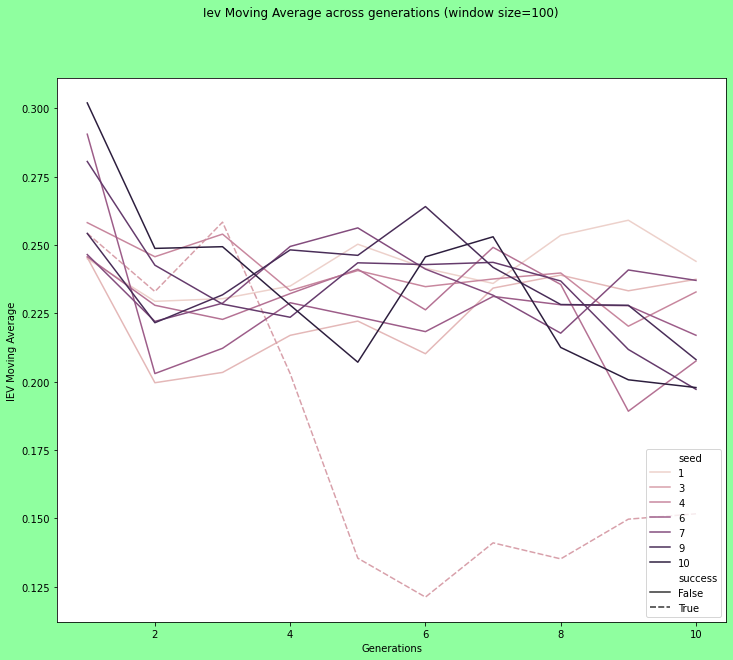

In [44]:
vec = []
seed = list(range(1,11))
moving_average_df = pd.DataFrame()
count=1
windowSize = 100
for i in range(0,1000,windowSize):    
    lowLim = i
    upLim = i+windowSize
    pivot_table = pd.pivot_table(iev_cv_df.drop('cv',axis=1)[(iev_cv_df['step']>lowLim) & (iev_cv_df['step']<upLim)], values=['iev'], index=['seed'], aggfunc=[min,max,np.mean,np.std])
    moving_average_df = pd.concat([moving_average_df,pd.DataFrame({'seed':seed,'ievMean':pivot_table['mean']['iev'].values,'step':np.ones(10)*count})])
    count+=1
    
moving_average_df['success']=False
moving_average_df.loc[moving_average_df['seed'].isin(seed_best),'success']=True

fig, ax = plt.subplots(figsize=(12,10))
fig.patch.set_facecolor('xkcd:mint green')
g=sns.lineplot(data=moving_average_df,y='ievMean',x='step',hue='seed',style='success',ax=ax)
plt.legend(loc='lower right')
#ax.set_xticks(range(1,7))
#a=ax.set_xticklabels(('0-250','250-500','500-750','750-1000','1000-1250','1250-1500'),rotation=45)
fig.suptitle(f'Iev Moving Average across generations (window size={windowSize})')
plt.xlabel('Generations')
plt.ylabel('IEV Moving Average')



1419